In [1]:
import warnings
warnings.filterwarnings("ignore")

I will be answering all the modeling questions along with :

Split the data into training and test times series (test starting at observation 700, use function window)

fit an Arima model, manually and with Auto-Arima on the training part
forecast the next 25 observation and plot the original ts and the forecasted one.
What do you observe?

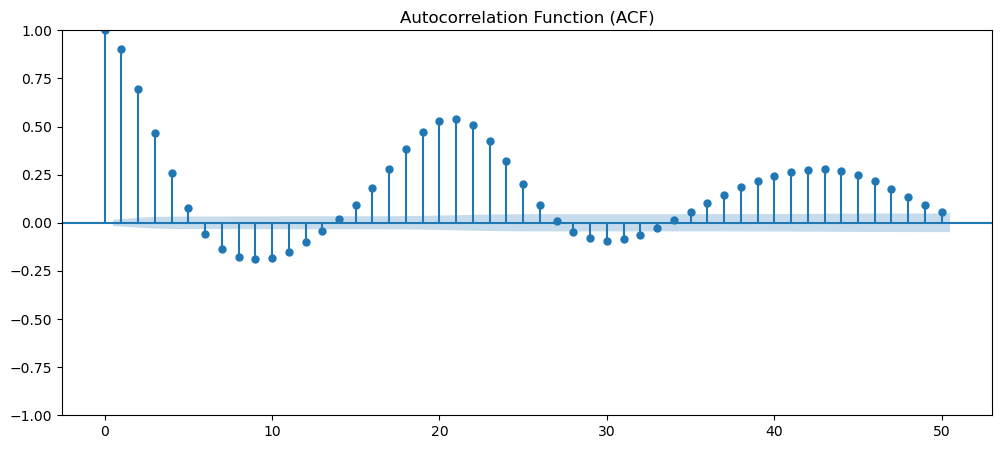

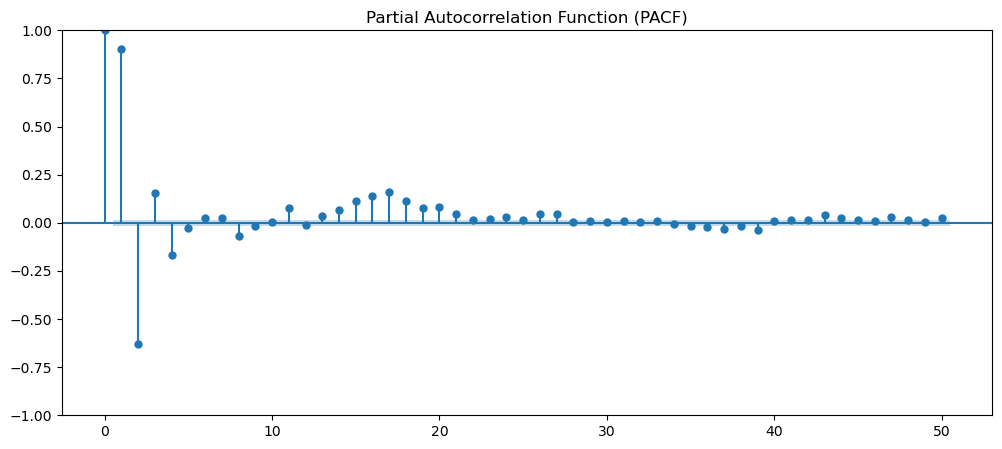

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('hour_pre.csv')

series = df['total_count_smoothed_kalman']

plt.figure(figsize=(12,5))
plot_acf(series, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(series, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


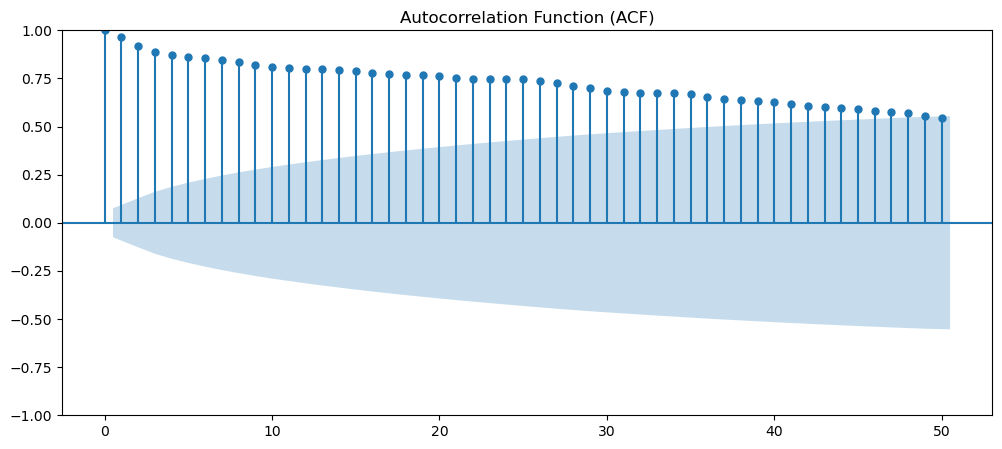

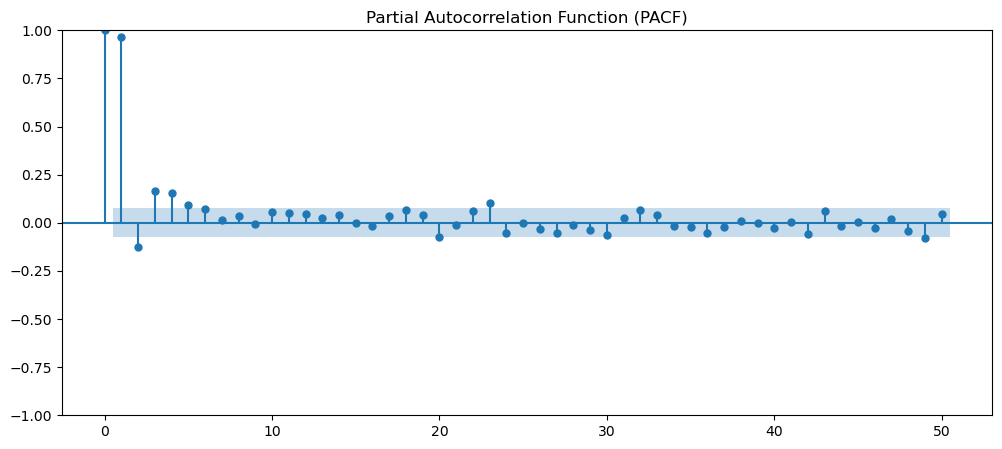

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('day-pre.csv')

series = df['total_count_smoothed_kalman']

plt.figure(figsize=(12,5))
plot_acf(series, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(series, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Timeseries is showing caracteristics of the moving average.ACF is showing sign function decay for both datasets

PACF Plot: The PACF plot is a measure of the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. The ‘p’ parameter of the ARIMA model refers to the number of lagged observations in the model. In the PACF plot, look at the point where the plot crosses the upper confidence interval for the first time. This point can be a good initial estimate for ‘p’.

ACF Plot: The ACF plot is a measure of the correlation between the time series and the lagged version of itself. The ‘q’ parameter of the ARIMA model refers to the number of lagged forecast errors in the prediction equation. In the ACF plot, look at the point where the plot crosses the upper confidence interval for the first time. This point can be a good initial estimate for ‘q’.

In [ ]:
## this is just a python test, i will switch to R after this since it is more suitable to answer teacher's questions

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

size = int(len(series) * 0.8)
train, test = series[0:size], series[size:len(series)]

model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

rmse = sqrt(mean_squared_error(test, predictions))
normalized_rmse = rmse / (np.max(test) - np.min(test))

print('Normalized RMSE: %.3f' % normalized_rmse)

Normalized RMSE: 0.263


ARIMA models work best with stationary data. but our data is not stationnary.
Determine ARIMA Model Parameters (p, d, q):

p is the order of the AutoRegressive part of the model. You can find the best value by inspecting the Partial Autocorrelation Plot.
d is the order of differencing required to make the time series stationary. If the time series is already stationary, d will be 0.
q is the order of the Moving Average part of the model. You can find the best value by inspecting the Autocorrelation Plot.

# R

In [2]:
library(forecast)
library(tseries)

# jjust loading my data in R
hour_data <- read.csv("hour_pre.csv", stringsAsFactors = FALSE)
day_data <- read.csv("day-pre.csv", stringsAsFactors = FALSE)


Warning message:
"package 'forecast' was built under R version 4.3.2"


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'tseries' was built under R version 4.3.2"


In [3]:
hour_data$datetime <- as.POSIXct(paste(hour_data$date, hour_data$hour, ":00:00"), format="%Y-%m-%d %H:%M:%S")

# Now create the ts object
# Note: Since the data is hourly, and we assume it starts from the first hour of the year, we use 1 as the start day
hour_ts <- ts(hour_data$total_count_smoothed_kalman, frequency=24, start=c(hour_data$year[1], hour_data$month[1], hour_data$day[1], hour_data$hour[1]))


In [4]:
day_data$datetime <- as.Date(day_data$date, format="%Y-%m-%d")

day_data$year <- as.numeric(day_data$year)
day_data$date <- as.Date(day_data$date, format="%Y-%m-%d")

start_year <- day_data$year[1]
start_yday <- as.numeric(format(min(day_data$date), "%j"))  

day_ts <- ts(day_data$total_count_smoothed_kalman, frequency=365, start=c(start_year, start_yday))


Could you model the smoothed time series using ARIMA model:
- What are the candidate model
- Choose your model and justify your choice


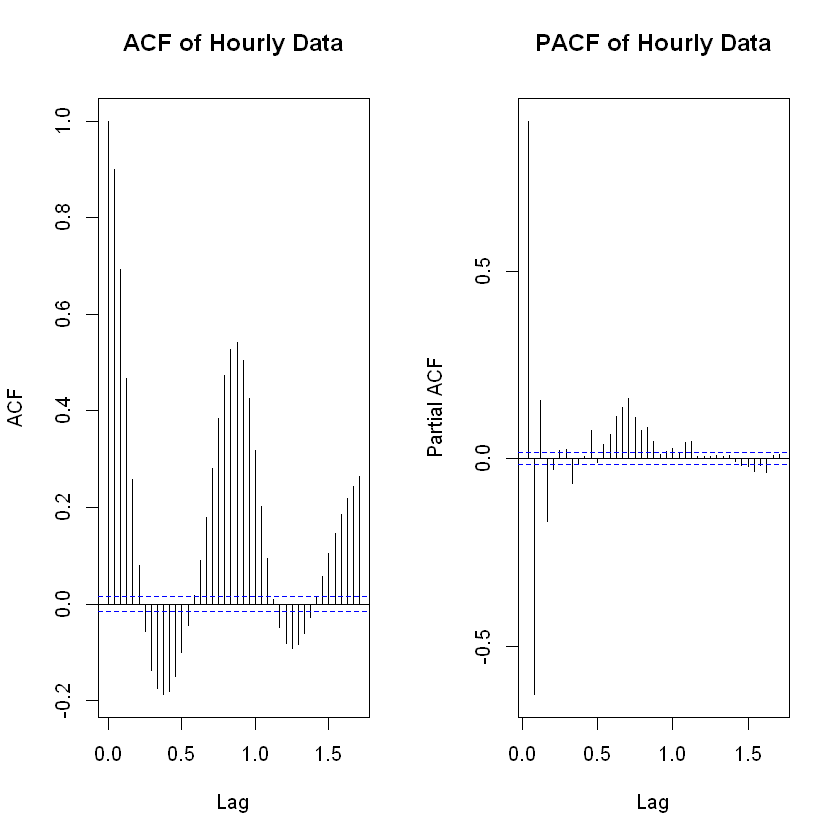

In [5]:
# Plot ACF and PACF
par(mfrow=c(1,2)) # Set up the graphics to show two plots side-by-side
acf(hour_ts, main="ACF of Hourly Data")
pacf(hour_ts, main="PACF of Hourly Data")


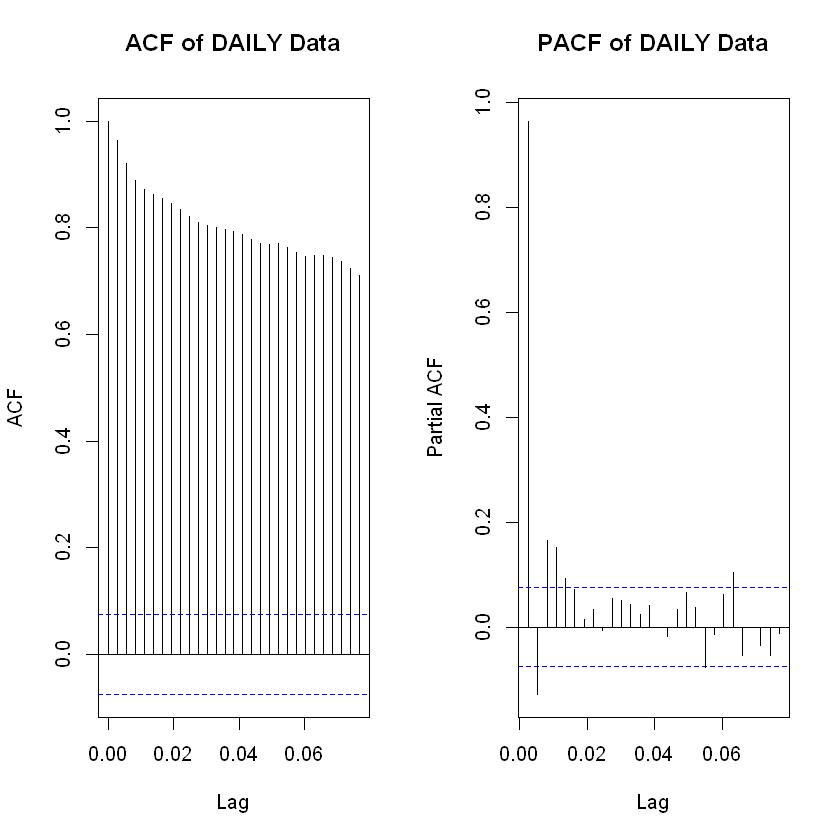

In [6]:
# Plot ACF and PACF
par(mfrow=c(1,2)) # Set up the graphics to show two plots side-by-side
acf(day_ts, main="ACF of DAILY Data")
pacf(day_ts, main="PACF of DAILY Data")


In [7]:
#if the ACF shows exponential decay and the PACF cuts off after a specific lag, it suggests an AR(p) model.
#If the series is not stationary, you will need to difference it (the 'I' in ARIMA stands for Integrated, which refers to differencing the data to make it stationary).

Interpret the ACF Plot:
If the ACF plot shows a slow decay, this may indicate the need for differencing to achieve stationarity.
A sharp cut-off after a few lags in the ACF suggests a possible MA component. The lag at which the ACF cuts off is often the q value in the ARIMA model.

Interpret the PACF Plot:
Similar to the ACF, a slow decay in the PACF may indicate the need for differencing.
A sharp cut-off after a few lags in the PACF suggests a possible AR component. The lag at which the PACF cuts off is often the p value in the ARIMA model.

Differencing:
If the original series is non-stationary, we need to difference it. The number of differencing (d) needed is usually determined by how many times we need to difference the data to achieve stationarity.

Candidate Models:
Based on the above interpretations, we could propose several candidate models. For instance, if the PACF cuts off after lag 2, and the ACF tails off, we might consider an AR(2) model. If the ACF cuts off after lag 2, consider an MA(2) model. If both exhibit a cut-off, an ARMA model with both components might be needed.

Model Selection with AIC and BIC:
We would fit several models with different p, d, and q values and then compare their AIC and BIC values. The model with the lowest AIC or BIC is generally preferred.

In [8]:
# Fit different ARIMA models for hours 
model1 <- arima(hour_ts, order=c(1,0,0))
model2 <- arima(hour_ts, order=c(0,0,1))
model3 <- arima(hour_ts, order=c(1,0,1))

# Compare AIC and BIC values
aic_values <- c(AIC(model1), AIC(model2), AIC(model3))
bic_values <- c(BIC(model1), BIC(model2), BIC(model3))

# Find the model with the lowest AIC and BIC
min_aic_index <- which.min(aic_values)
min_bic_index <- which.min(bic_values)

best_aic_model <- get(paste0("model", min_aic_index))
best_bic_model <- get(paste0("model", min_bic_index))

# Output the best models based on AIC and BIC
best_aic_model
best_bic_model



Call:
arima(x = hour_ts, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.8368  0.6498   149.4710
s.e.  0.0046  0.0056     3.2516

sigma^2 estimated as 1544:  log likelihood = -75893.89,  aic = 151795.8


Call:
arima(x = hour_ts, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.8368  0.6498   149.4710
s.e.  0.0046  0.0056     3.2516

sigma^2 estimated as 1544:  log likelihood = -75893.89,  aic = 151795.8

In [9]:
# Load the necessary library
library(forecast)

auto_fit <- auto.arima(hour_ts)

# Look at the summary of the fitted model
summary(auto_fit)


Series: hour_ts 
ARIMA(5,1,0)(0,0,1)[24] 

Coefficients:
         ar1      ar2     ar3      ar4      ar5    sma1
      0.7125  -0.3519  0.0610  -0.0079  -0.1497  0.0325
s.e.  0.0081   0.0100  0.0104   0.0100   0.0081  0.0082

sigma^2 = 1560:  log likelihood = -75961.29
AIC=151936.6   AICc=151936.6   BIC=151989.9

Training set error measures:
                      ME     RMSE     MAE       MPE     MAPE      MASE
Training set 0.003045432 39.48807 26.7984 -7.145726 24.44856 0.2797697
                    ACF1
Training set -0.01973832

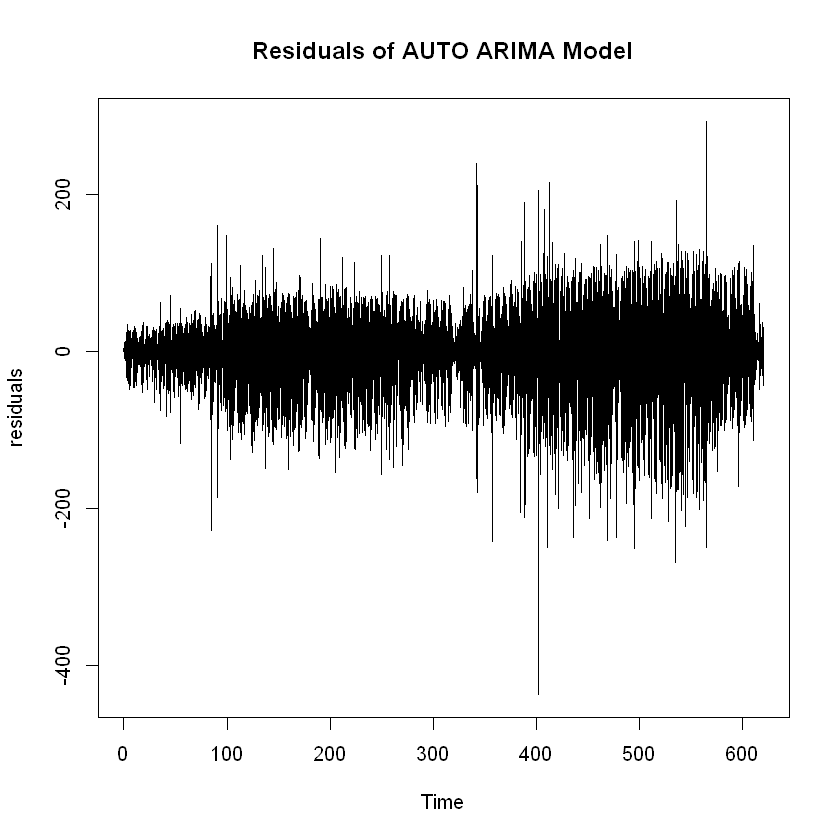

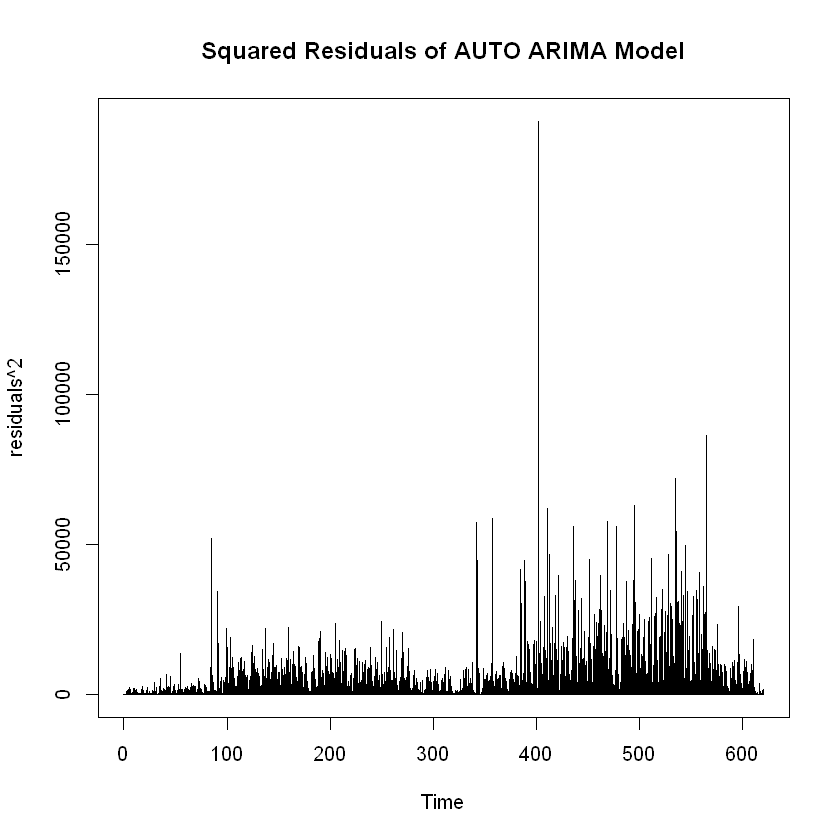

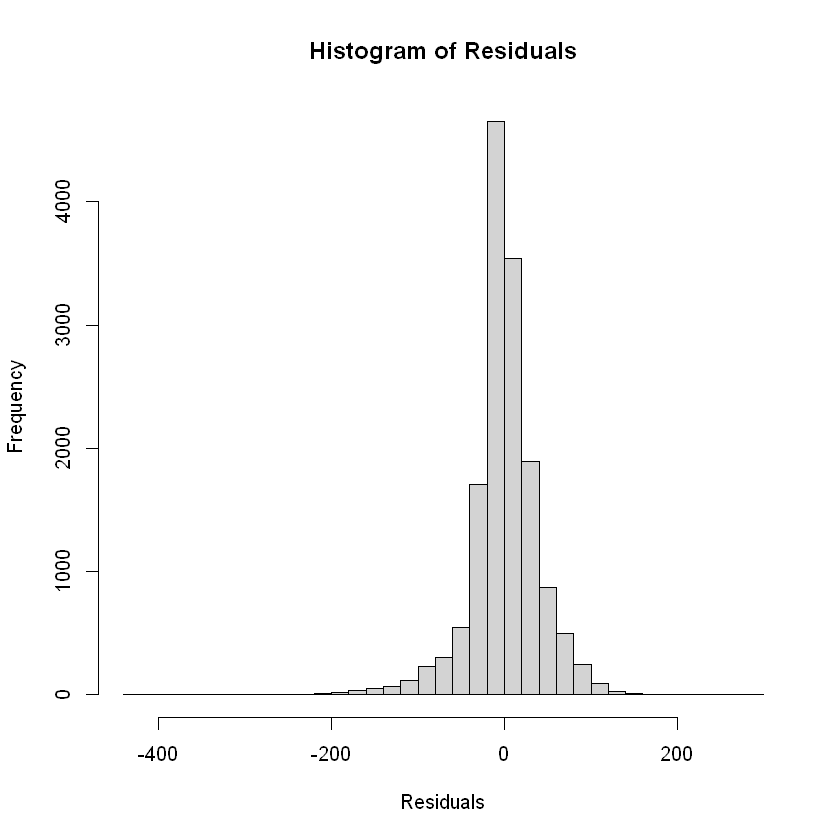

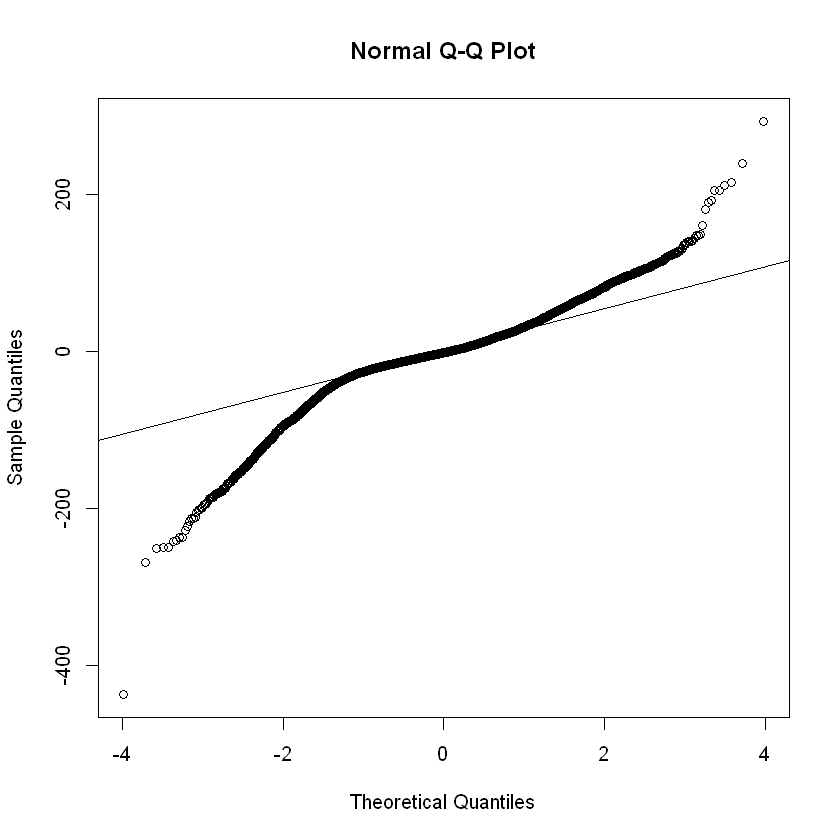

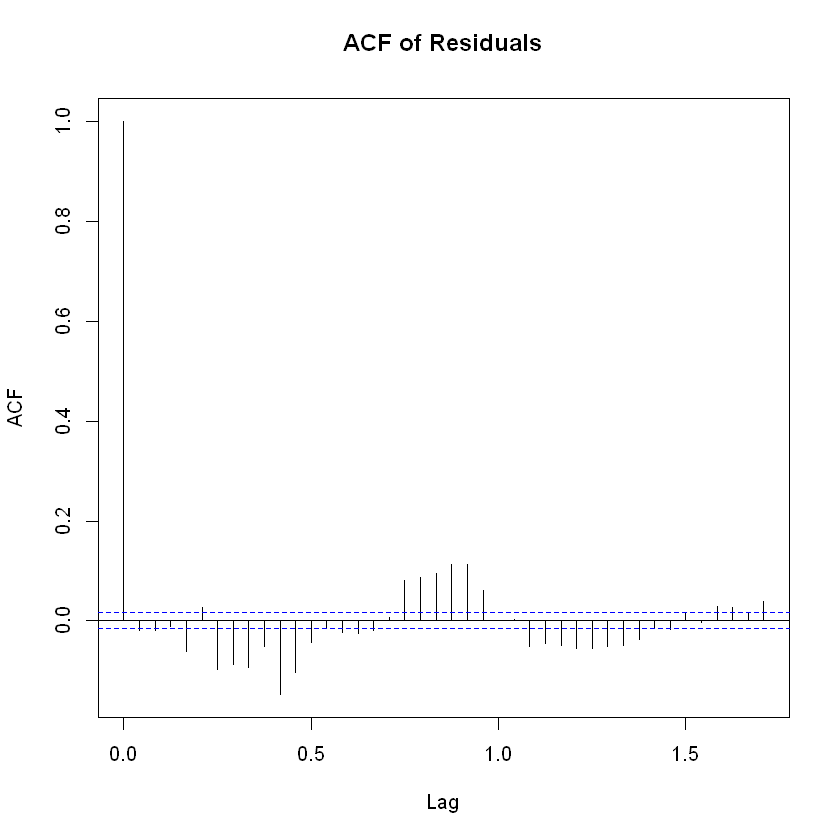


	Box-Ljung test

data:  residuals
X-squared = 501.74, df = 9.6098, p-value < 2.2e-16


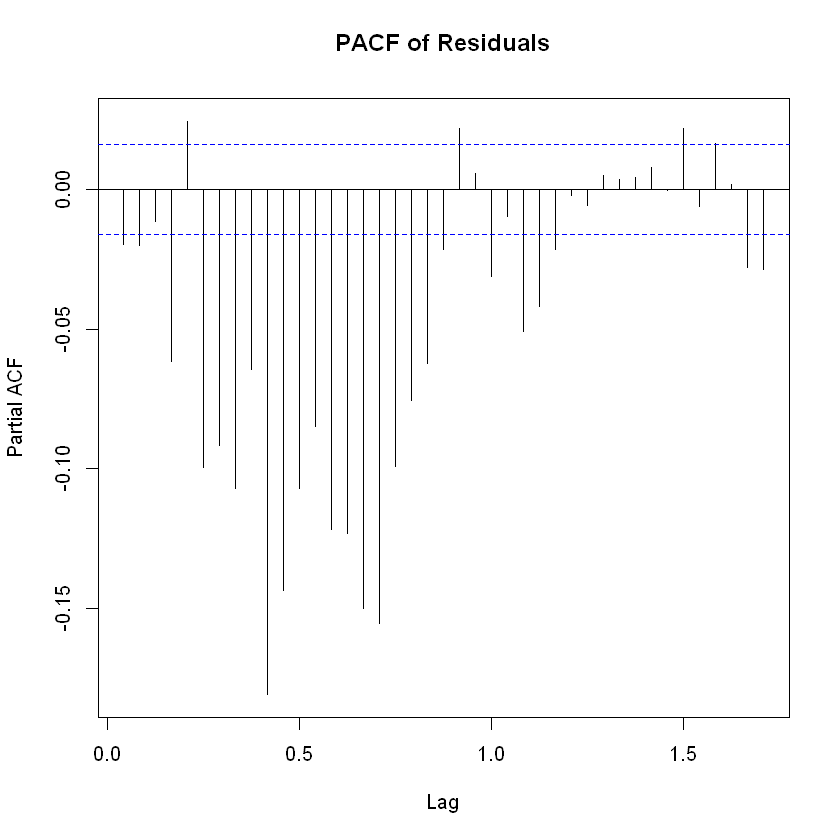

In [10]:
residuals <- residuals(auto_fit)

# Plot the residuals
plot(residuals, main="Residuals of AUTO ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of AUTO ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


Forecasting with ARIMA Models
Fit an ARIMA model on de-seasonal cnt (remove the season of cnt before fitting the model)

In [11]:
deseasonalized_hour_ts <- diff(hour_ts, lag = 24)


In [12]:
# Fit an ARIMA model to the deseasonalized data
# The order will be based on prior analysis (ACF, PACF), but here is an example:
arima_model_deseasonalized <- arima(deseasonalized_hour_ts, order=c(1,0,1))
summary(arima_model_deseasonalized)



Call:
arima(x = deseasonalized_hour_ts, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.7730  0.6519     0.1193
s.e.  0.0054  0.0057     3.2187

sigma^2 estimated as 2913:  log likelihood = -80494.98,  aic = 160998

Training set error measures:
                       ME     RMSE      MAE       MPE    MAPE      MASE
Training set 0.0005282714 53.96918 37.41841 -40.23183 219.881 0.7417518
                  ACF1
Training set 0.1423285

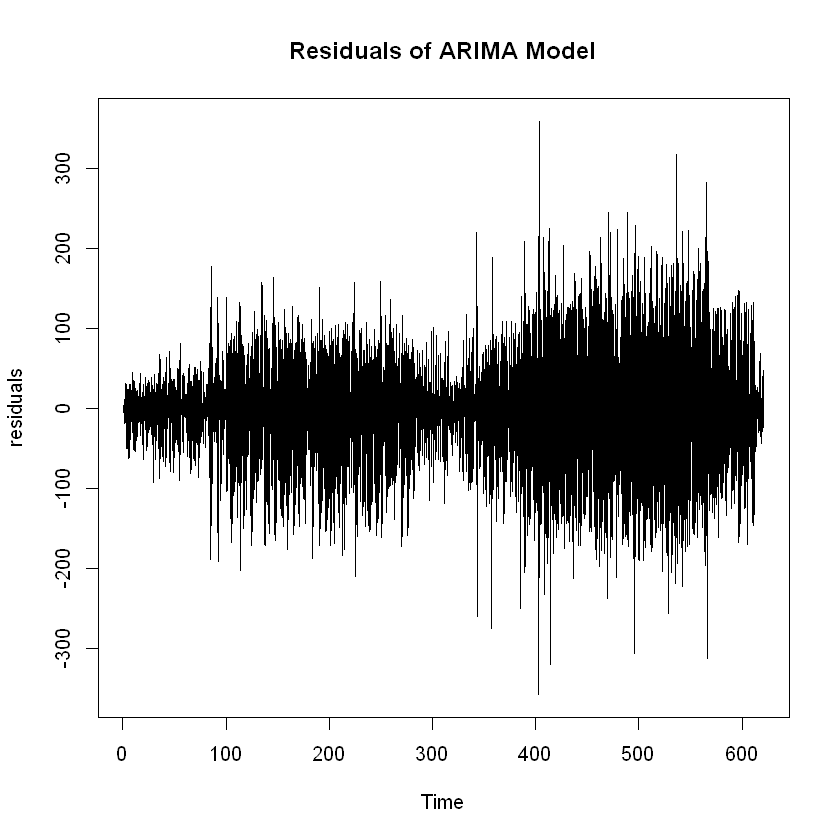

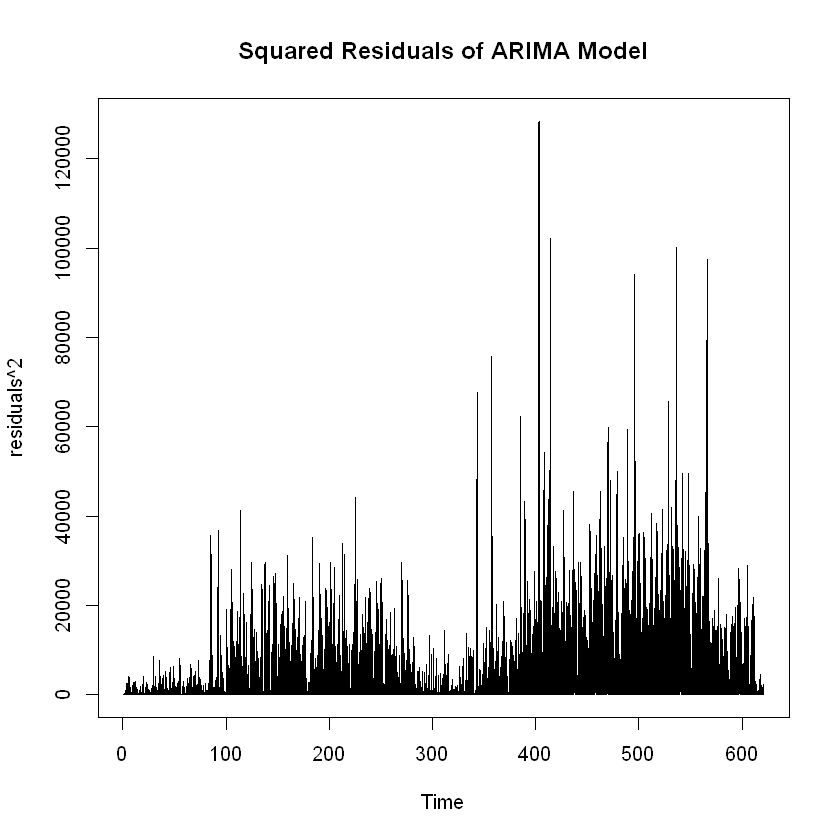

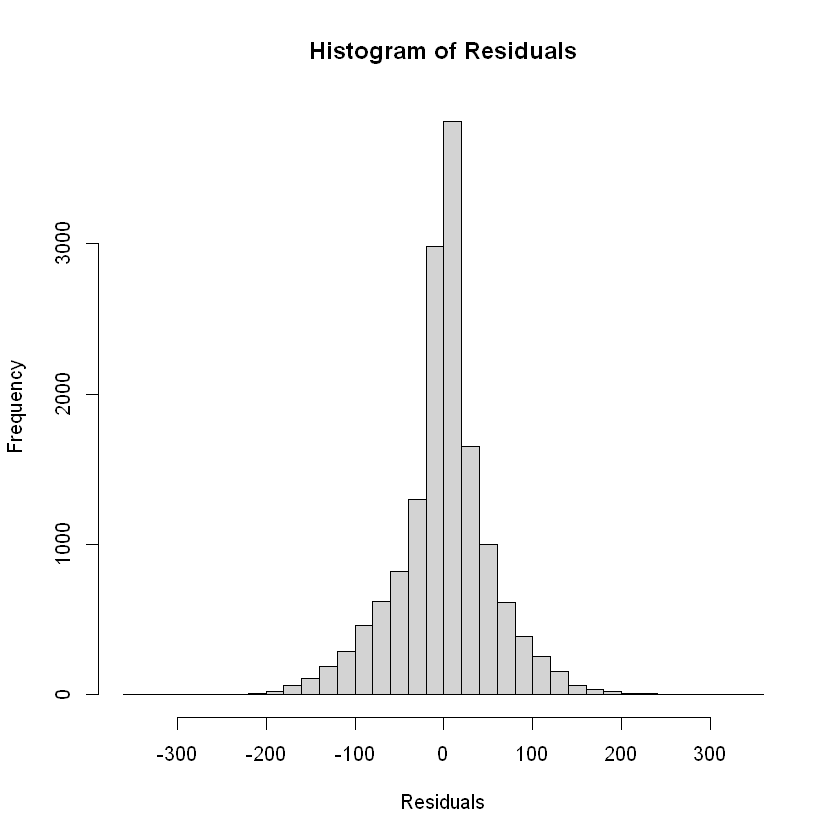

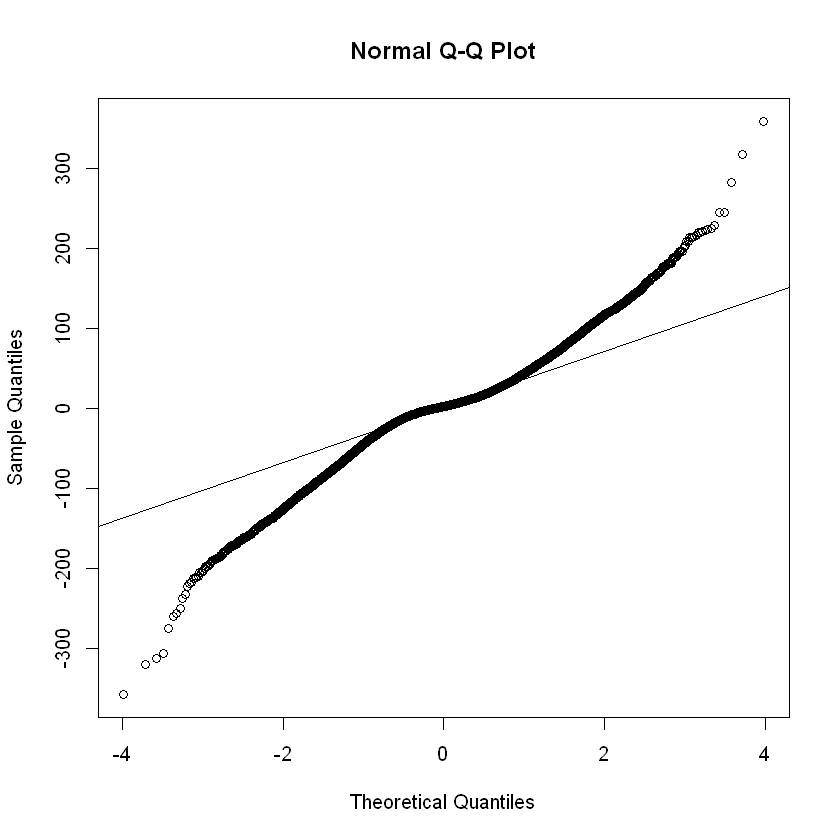

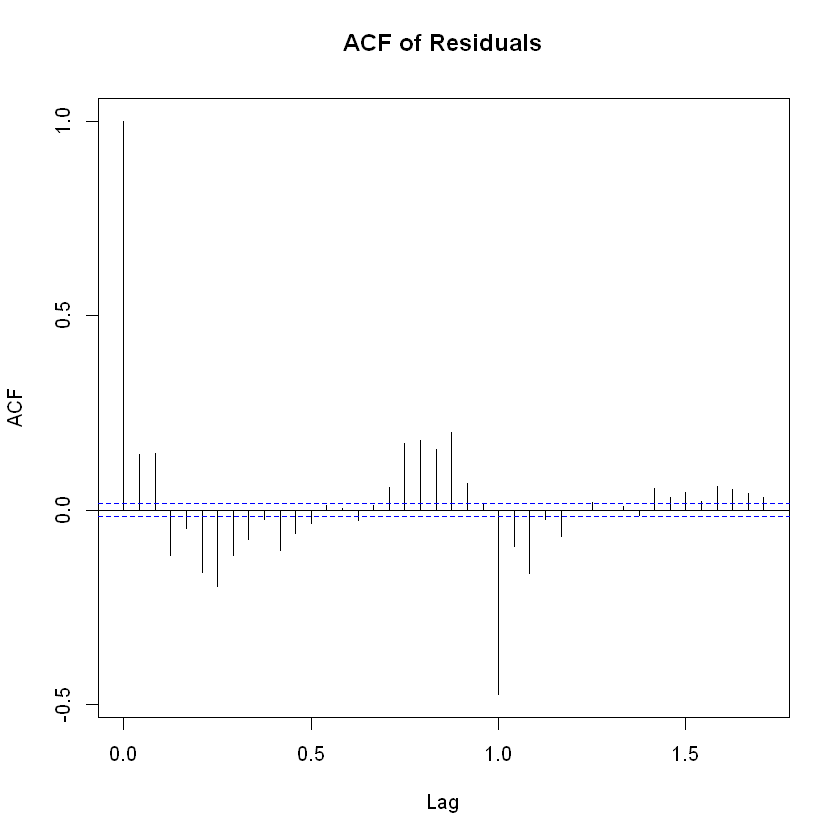


	Box-Ljung test

data:  residuals
X-squared = 2123.5, df = 9.6082, p-value < 2.2e-16


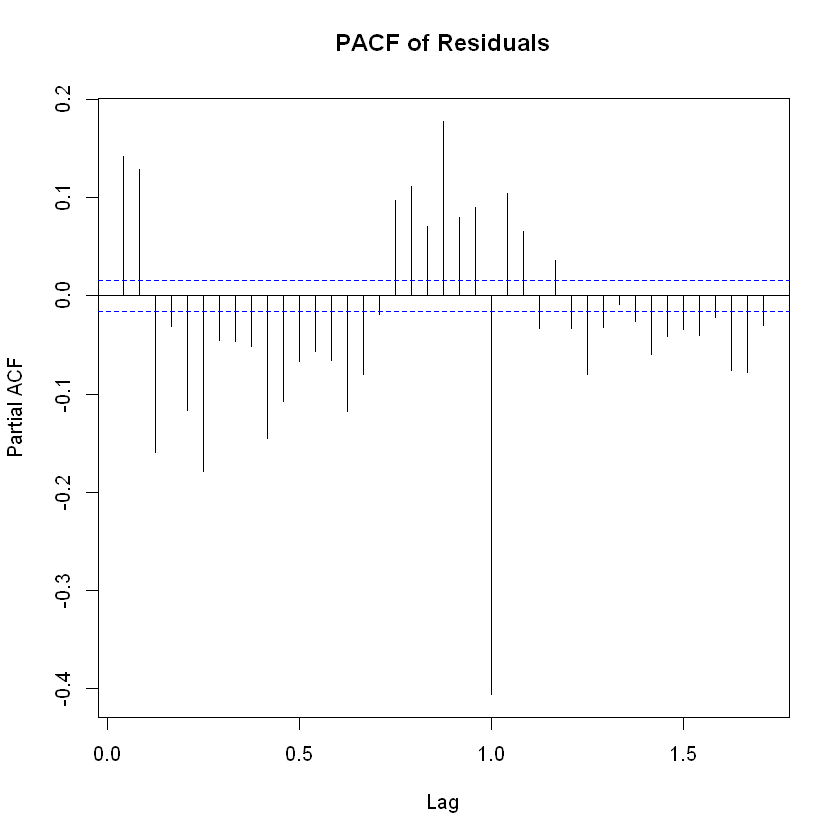

In [13]:
residuals <- residuals(arima_model_deseasonalized)

# Plot the residuals
plot(residuals, main="Residuals of ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


In [14]:
# Fit an ARIMA model to the deseasonalized data
# The order will be based on prior analysis (ACF, PACF), but here is an example:
arima_model_deseasonalized <- arima(deseasonalized_hour_ts, order=c(5,0,1))
summary(arima_model_deseasonalized)


Call:
arima(x = deseasonalized_hour_ts, order = c(5, 0, 1))

Coefficients:
         ar1     ar2      ar3     ar4      ar5     ma1  intercept
      0.5415  0.4970  -0.5084  0.1684  -0.1651  0.9998     0.1198
s.e.  0.0081  0.0091   0.0091  0.0091   0.0081  0.0005     1.7539

sigma^2 estimated as 2492:  log likelihood = -79336.99,  aic = 158690

Training set error measures:
                        ME     RMSE      MAE       MPE     MAPE      MASE
Training set -7.966719e-05 49.92233 34.04321 -20.49773 197.1925 0.6748446
                    ACF1
Training set -0.01554515

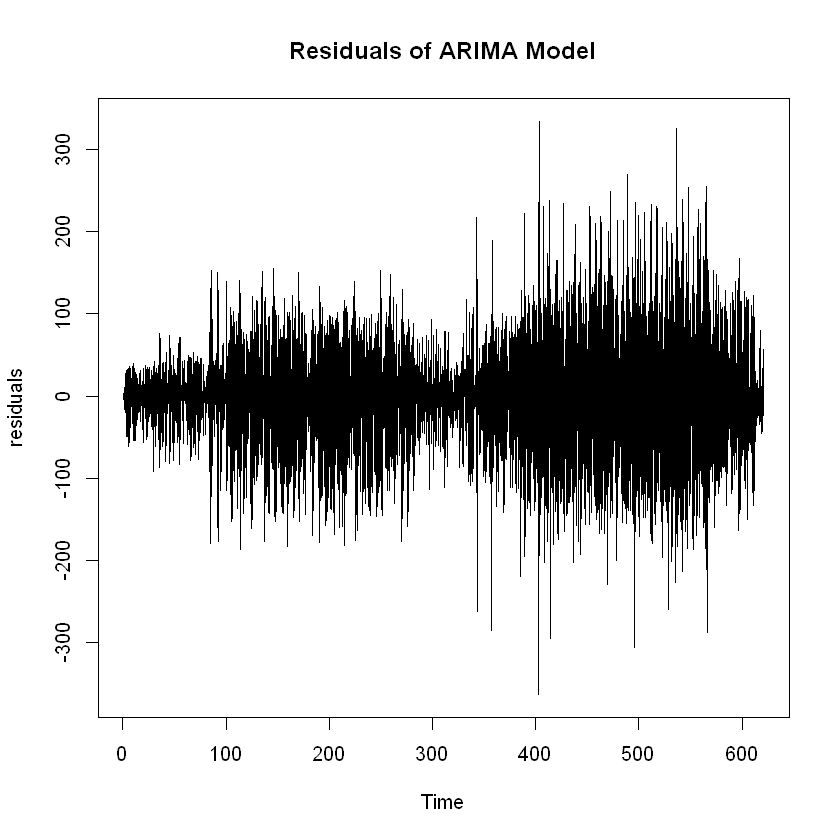

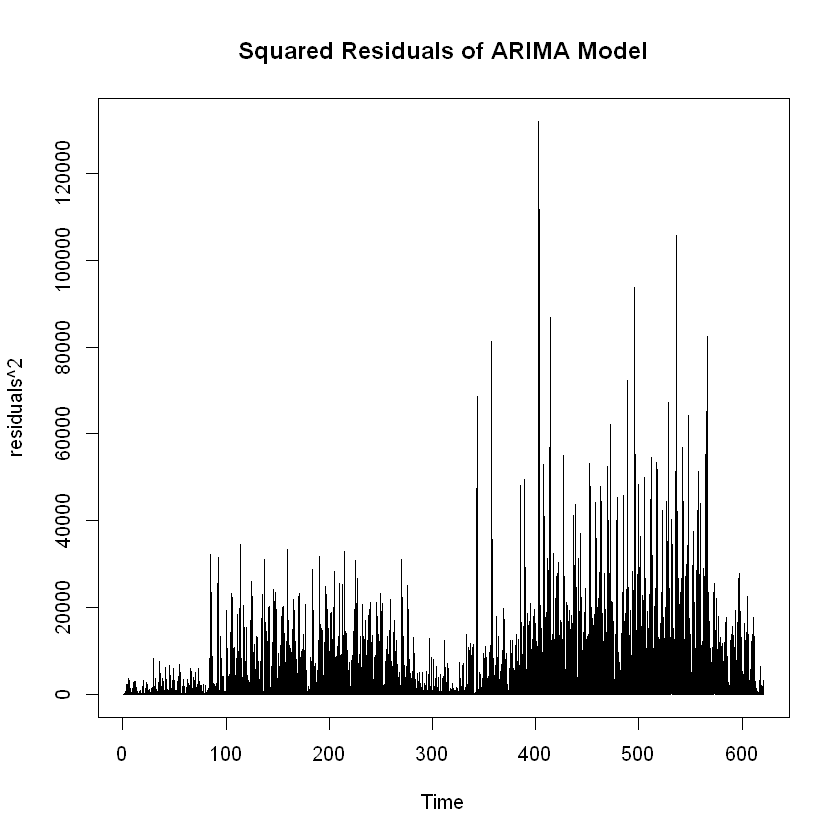

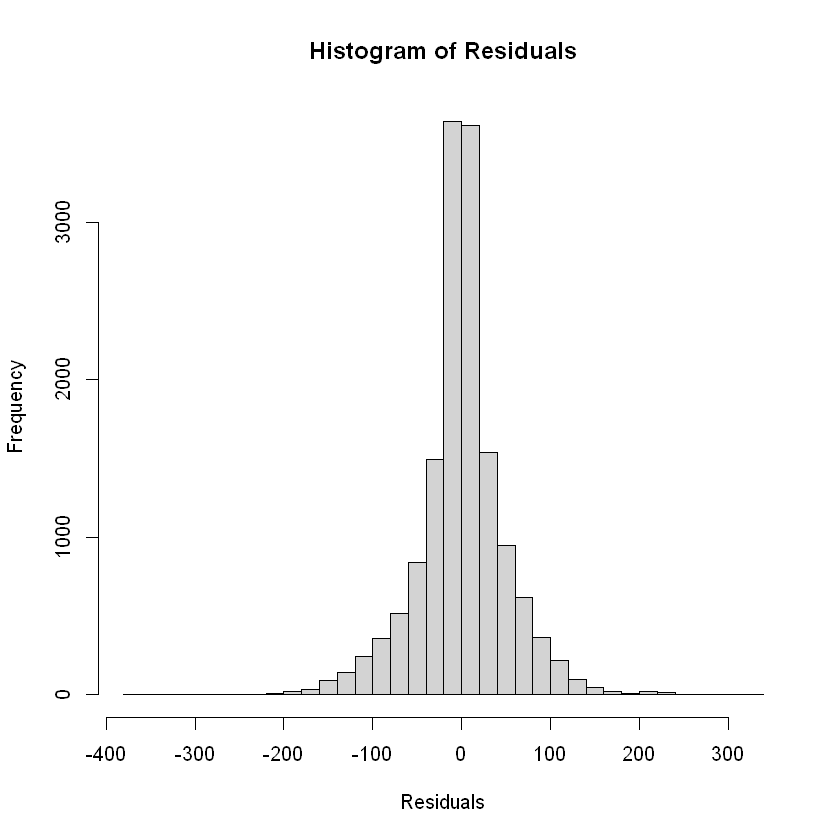

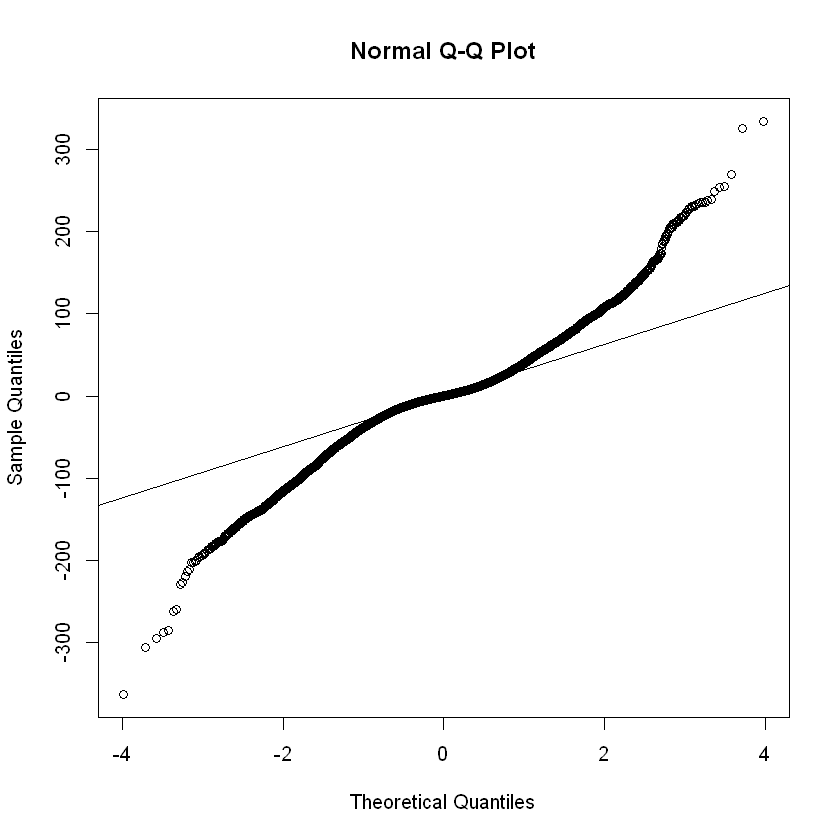

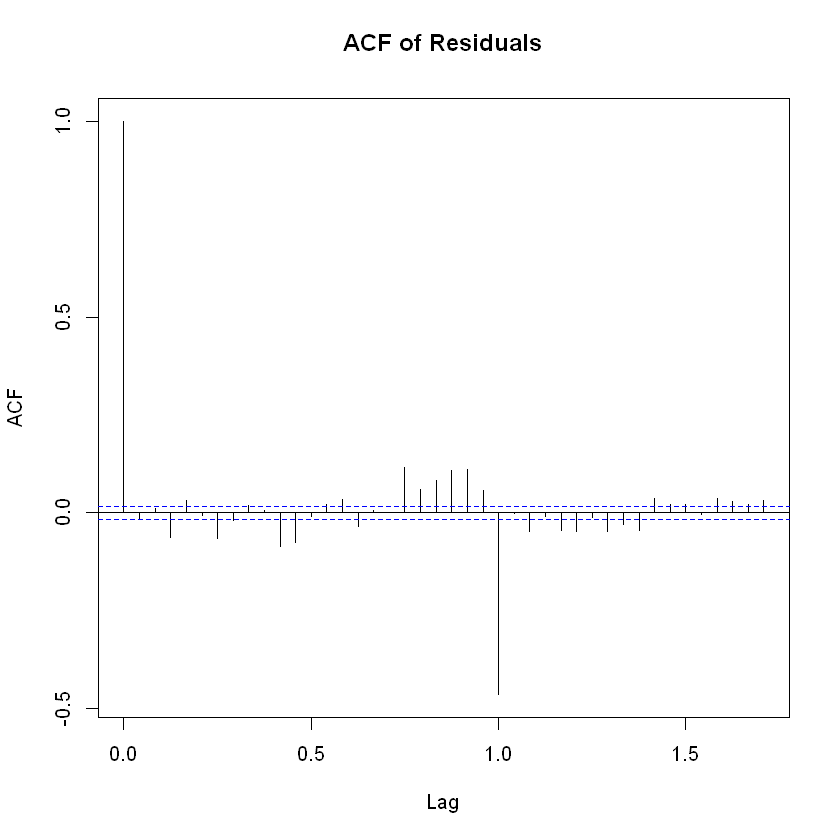


	Box-Ljung test

data:  residuals
X-squared = 153.94, df = 9.6082, p-value < 2.2e-16


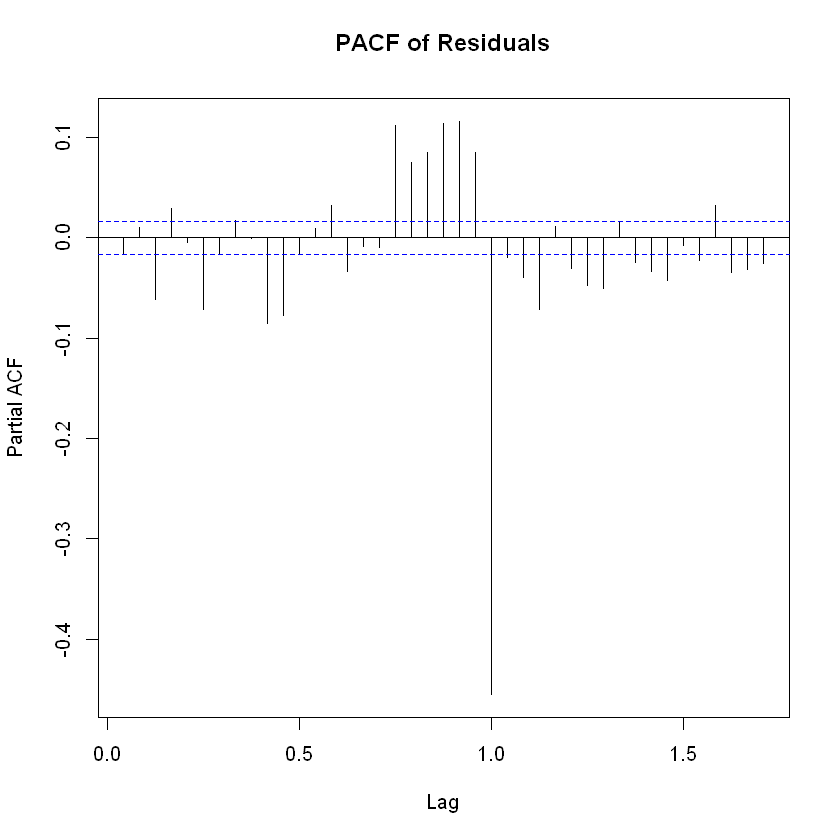

In [15]:
residuals <- residuals(arima_model_deseasonalized)

# Plot the residuals
plot(residuals, main="Residuals of ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


In [16]:
# Fit an ARIMA model to the deseasonalized data
# The order will be based on prior analysis (ACF, PACF), but here is an example:
arima_model_deseasonalized <- arima(deseasonalized_hour_ts, order=c(6,1,2))
summary(arima_model_deseasonalized)


Call:
arima(x = deseasonalized_hour_ts, order = c(6, 1, 2))

Coefficients:
         ar1     ar2      ar3     ar4      ar5      ar6     ma1      ma2
      0.5255  0.5129  -0.5568  0.2157  -0.1135  -0.0953  -2e-04  -0.9998
s.e.  0.0082  0.0092   0.0099  0.0099   0.0092   0.0082   5e-04   0.0005

sigma^2 estimated as 2470:  log likelihood = -79267.41,  aic = 158552.8

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.1090935 49.69442 33.91931 -9.869306 208.2933 0.6723885
                    ACF1
Training set 0.002364164

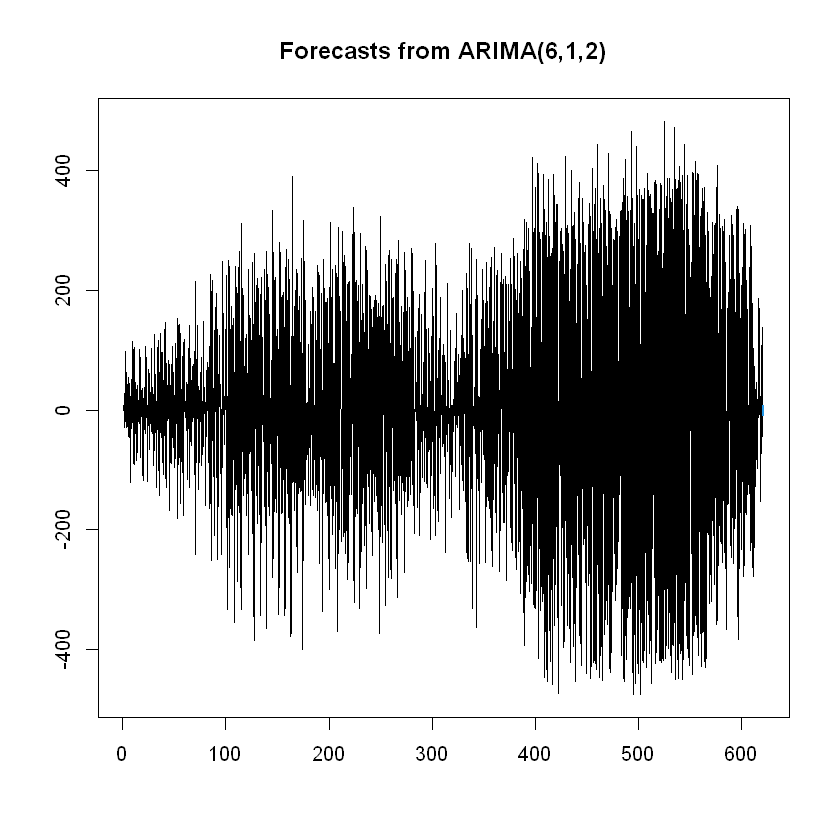

In [17]:
# Forecast future values
forecast_deseasonalized <- forecast(arima_model_deseasonalized, h=24) # For next 24 hours
plot(forecast_deseasonalized)


In [18]:
# Load the necessary library
library(forecast)


auto_fit <- auto.arima(deseasonalized_hour_ts)

# Look at the summary of the fitted model
summary(auto_fit)


Series: deseasonalized_hour_ts 
ARIMA(4,0,3)(2,0,0)[24] with zero mean 

Coefficients:
         ar1      ar2     ar3      ar4      ma1      ma2      ma3     sar1
      1.7512  -1.0827  0.3475  -0.1406  -0.2214  -0.2183  -0.0999  -0.6420
s.e.  0.0720   0.1302  0.0807   0.0209   0.0716   0.0304   0.0283   0.0079
         sar2
      -0.3169
s.e.   0.0078

sigma^2 = 1746:  log likelihood = -76688.36
AIC=153396.7   AICc=153396.7   BIC=153472.8

Training set error measures:
                     ME     RMSE     MAE      MPE     MAPE      MASE
Training set 0.04340089 41.77444 29.3619 41.61724 249.8707 0.1865923
                    ACF1
Training set 0.001066848

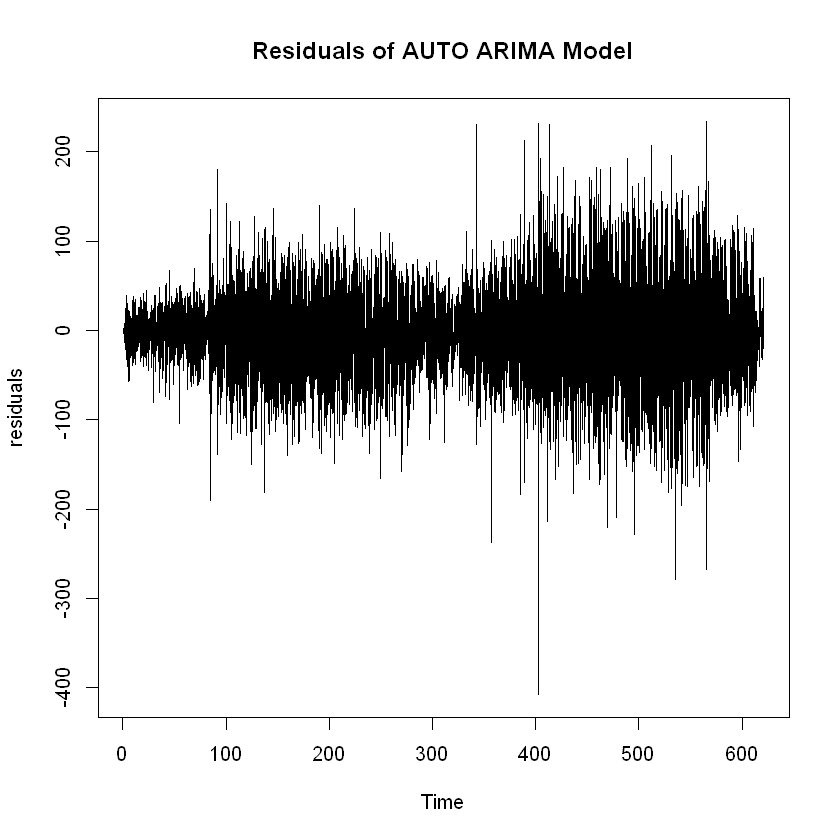

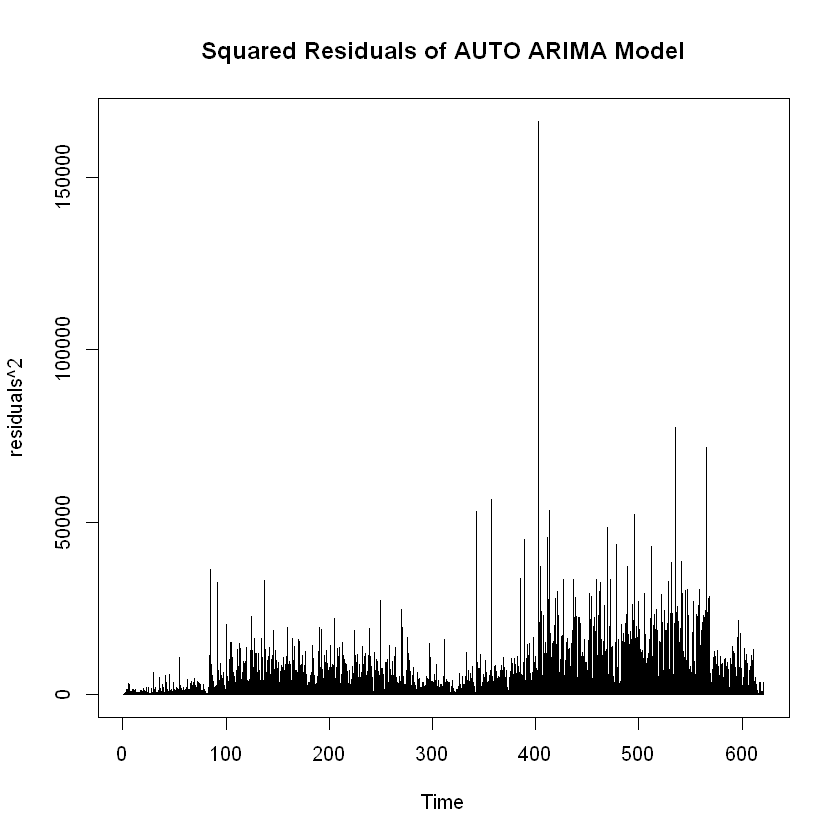

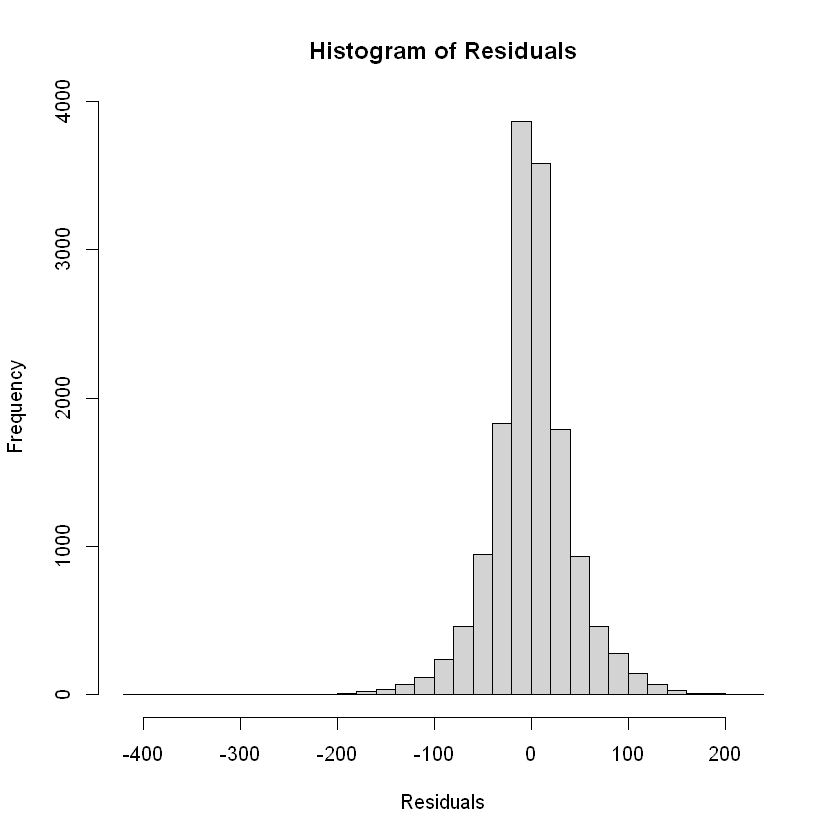

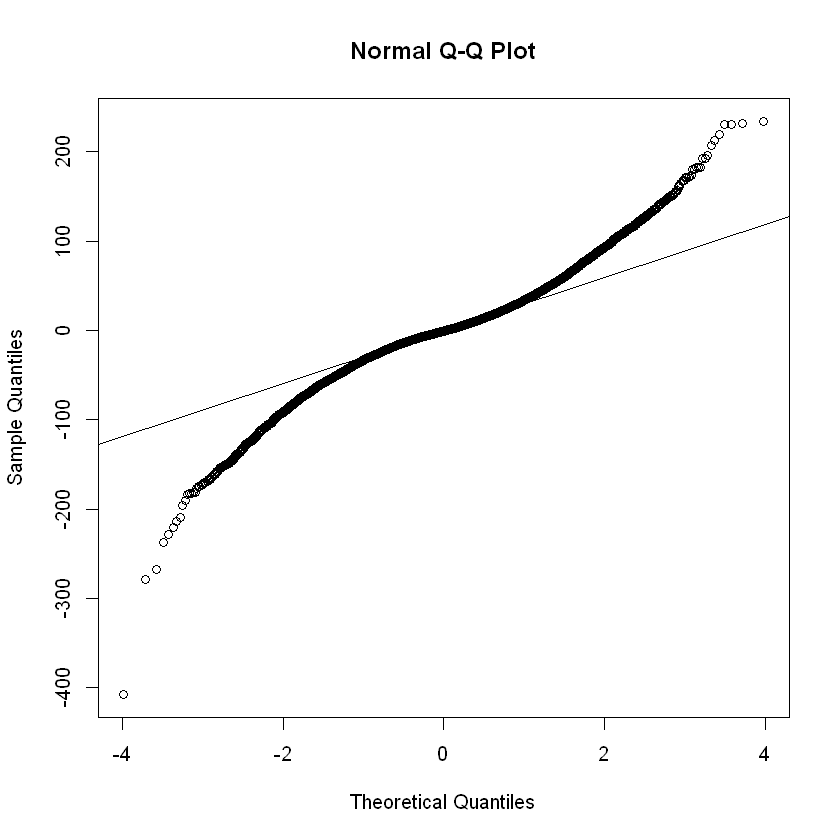

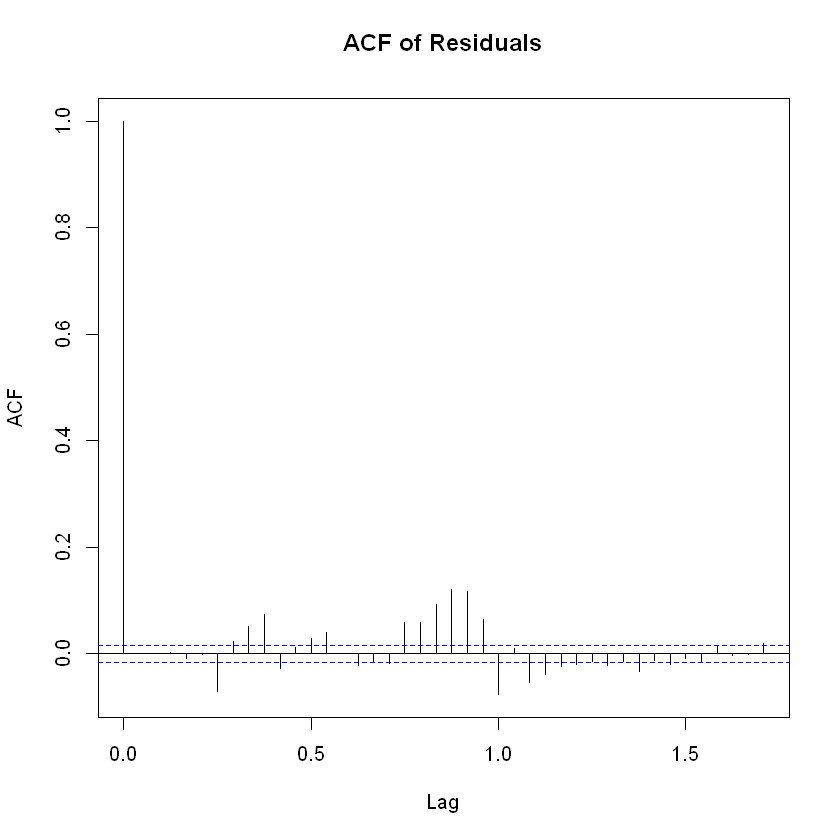


	Box-Ljung test

data:  residuals
X-squared = 202.17, df = 9.6082, p-value < 2.2e-16


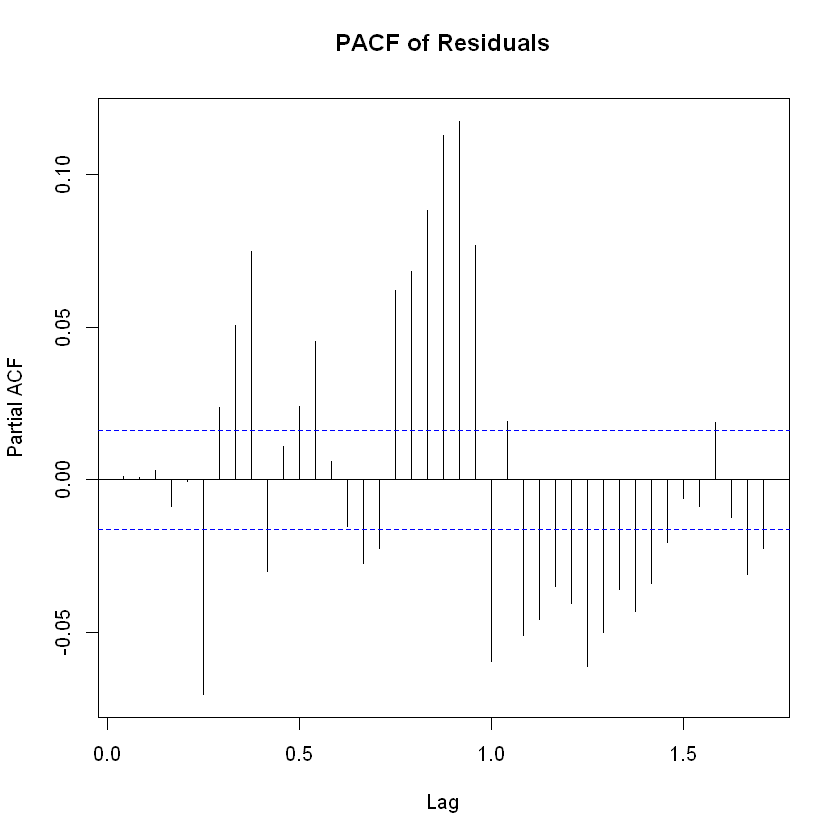

In [19]:
residuals <- residuals(auto_fit)

# Plot the residuals
plot(residuals, main="Residuals of AUTO ARIMA Model")

# Check if residuals have constant variance
# This is a plot of residuals vs. time
plot(residuals^2, main="Squared Residuals of AUTO ARIMA Model")

# Check for normality of residuals
hist(residuals, breaks=30, main="Histogram of Residuals", xlab="Residuals")
qqnorm(residuals)
qqline(residuals)

# Autocorrelation function (ACF) plot to check for autocorrelation in residuals
acf(residuals, main="ACF of Residuals")

# Partial autocorrelation function (PACF) plot to check for autocorrelation in residuals
pacf(residuals, main="PACF of Residuals")

# Perform a Ljung-Box test to statistically test for lack of autocorrelation in residuals
Box.test(residuals, lag=log(length(residuals)), type="Ljung-Box")


Calculate forecast using the chosen model
plot both the original and the forecasted time series


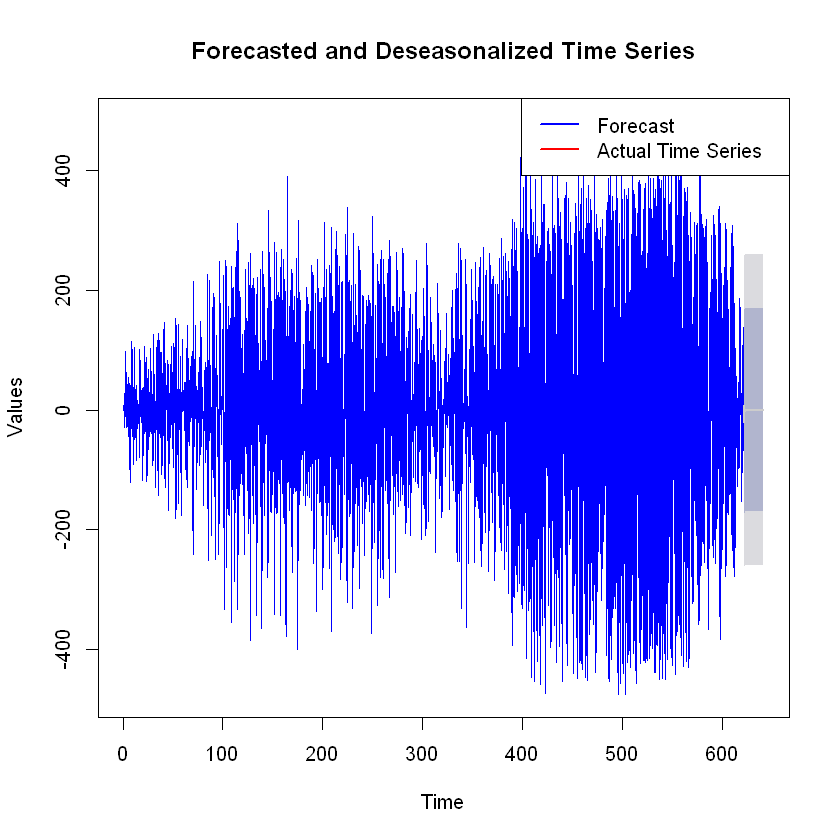

In [43]:
# Load the necessary library
library(forecast)

# Fit the ARIMA model to the deseasonalized hourly time series
chosen_model <- arima(deseasonalized_hour_ts, order=c(4,0,3))

# Calculate forecast using the chosen model for the next 480 hours
forecasted_values <- forecast(chosen_model, h=480)

# Plot the forecasted values with confidence intervals
plot(forecasted_values, main="Forecasted and Deseasonalized Time Series", 
     xlab="Time", ylab="Values", fcol="#CCCCCC", col="blue")

# Check if the forecast period overlaps with the actual data
if (length(deseasonalized_hour_ts) >= 480) {
    # Align and add the actual time series to the plot
    end_index <- length(deseasonalized_hour_ts)
    start_index <- end_index - 479  # Align the last 480 hours of actual data with the forecast
    lines(start_index:end_index, deseasonalized_hour_ts[start_index:end_index], col='red', lwd=2)
} else {
    # If the actual data is less than 480 hours, plot as much as available
    lines(deseasonalized_hour_ts, col='red', lwd=2)
}

# Add a legend for clarity
legend("topright", legend=c("Forecast", "Actual Time Series"), col=c("blue", "red"), lty=1, lwd=2)


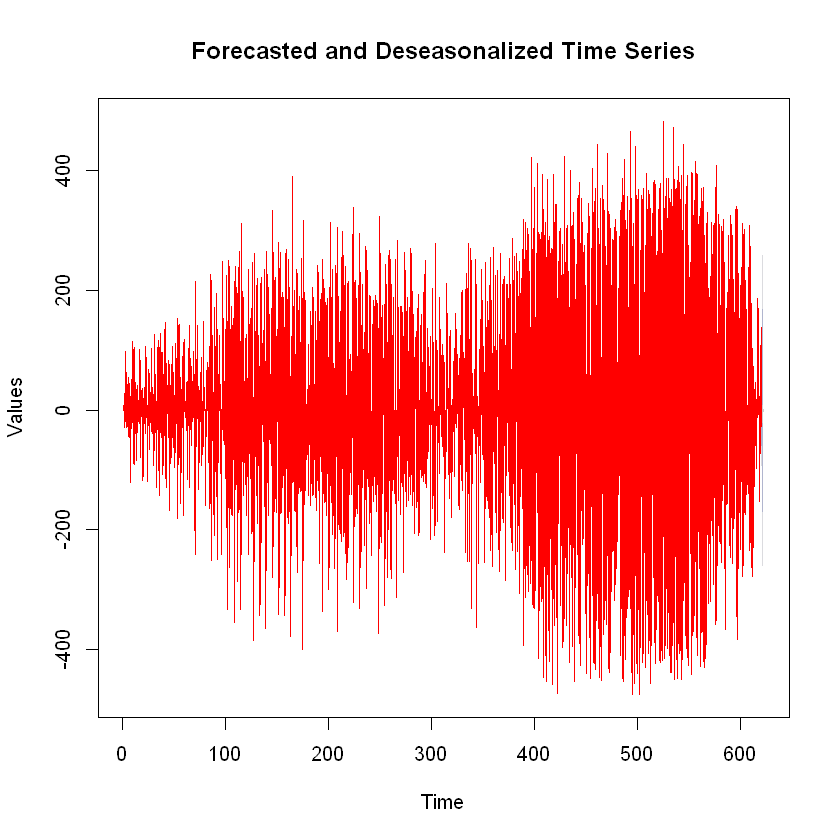

In [20]:
# Load the necessary library
library(forecast)

chosen_model <- arima(deseasonalized_hour_ts, order=c(4,0,3))

# Calculate forecast using the chosen model
forecasted_values <- forecast(chosen_model) # Forecast the next 480 hours, for example


# Plot the forecasted values with confidence intervals
plot(forecasted_values, main="Forecasted and Deseasonalized Time Series", 
     xlab="Time", ylab="Values", fcol="#CCCCCC", col="blue")

# Add the original deseasonalized time series to the plot with less dominance
lines(deseasonalized_hour_ts, col='red', lwd=0.2)



In [21]:
# Define the split point for the training and test sets
split_point <- 700

time_index <- time(deseasonalized_hour_ts)
split_time <- time_index[split_point]

# Split the time series into training and test sets
training_set <- window(deseasonalized_hour_ts, end=split_time)
test_set <- window(deseasonalized_hour_ts, start=split_time + 1/(frequency(deseasonalized_hour_ts)))

# Check to ensure the split is correct
print(start(training_set))
print(end(training_set))
print(start(test_set))
print(end(test_set))


[1] 1 1
[1] 30  4
[1] 30  5
[1] 621   6


In [22]:
# Load the necessary library
library(forecast)

# Fit a manual ARIMA model (example: ARIMA(4,0,3))
manual_model <- arima(training_set, order=c(6,1,2))

# Fit an ARIMA model automatically
auto_model <- auto.arima(training_set)


In [23]:
# Load the necessary library
library(forecast)

# Fit a manual ARIMA model (example: ARIMA(4,0,3))
manual_model <- arima(training_set, order=c(4,0,3))

# Fit an ARIMA model automatically
auto_model <- auto.arima(training_set)


In [24]:
# Forecast the next 25 observations with the manual model
manual_forecast <- forecast(manual_model, h=25)

# Forecast the next 25 observations with the auto model
auto_forecast <- forecast(auto_model, h=25)


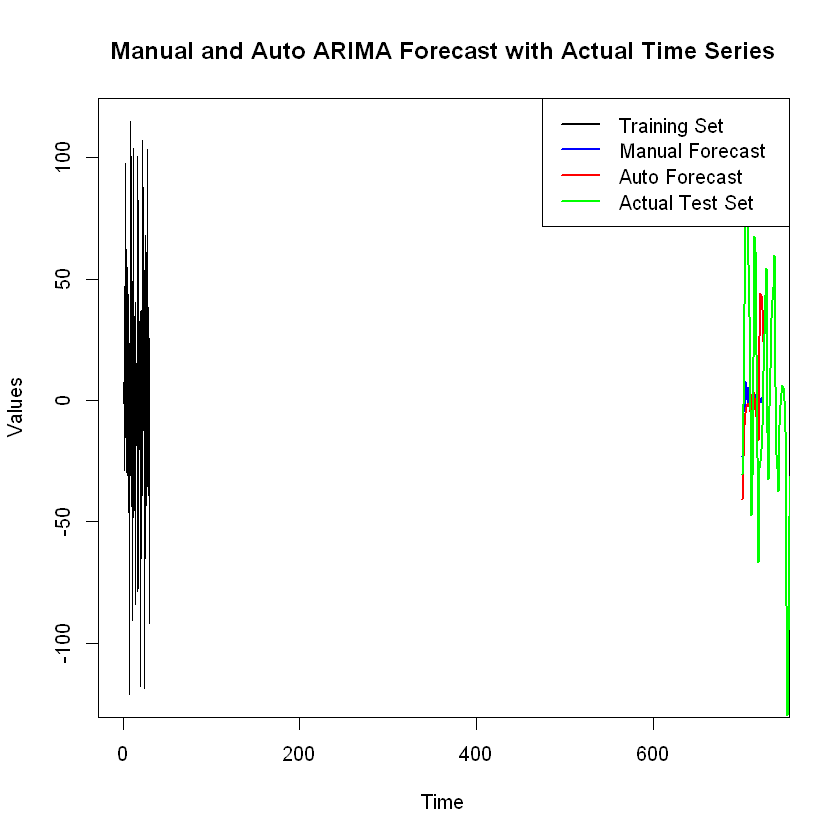

In [38]:
# First, define the full time range for the plot, which includes both the training and test sets
full_time_range <- 1:(length(training_set) + end_test_set)

# Then, plot the entire training set, which contains the historical data
plot(training_set, type = "l", xlim = c(1, length(full_time_range)), 
     xlab = "Time", ylab = "Values", main = "Manual and Auto ARIMA Forecast with Actual Time Series")

# Add the forecasted values from the manual forecast to the plot
# Note: Adjust the 'start' index to align with the end of the training set
lines(c(rep(NA, length(training_set)), manual_forecast$mean), col = "blue", lwd = 2)

# Add the forecasted values from the automatic forecast to the plot
# Note: We add NA values to align the start of the forecast with the end of the training set
lines(c(rep(NA, length(training_set)), auto_forecast$mean), col = "red", lwd = 2)

# Finally, overlay the actual test set values to compare with the forecasts
lines(c(rep(NA, length(training_set)), test_set), col = "green", lwd = 2)

# Add a legend to the plot to differentiate the lines
legend("topright", legend = c("Training Set", "Manual Forecast", "Auto Forecast", "Actual Test Set"),
       col = c("black", "blue", "red", "green"), lty = 1, lwd = 2)


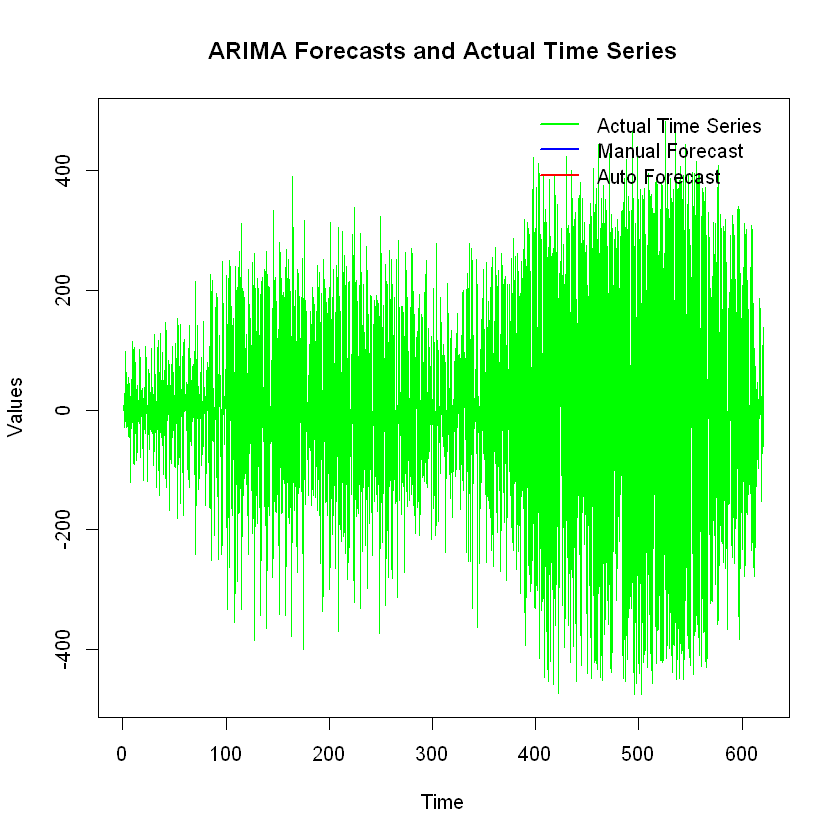

In [40]:
# Plot the entire training set
plot(deseasonalized_hour_ts, main="ARIMA Forecasts and Actual Time Series", 
     xlab="Time", ylab="Values", col="green", lwd=1)

# Overlay the manual forecast for the last 25 observations
# The index for the forecast will be aligned with the time series
forecast_end_index <- length(deseasonalized_hour_ts) + length(manual_forecast$mean)
lines(seq(length(deseasonalized_hour_ts), forecast_end_index - 1), manual_forecast$mean, col='blue', lwd=2)

# Overlay the automatic forecast for the last 25 observations
# Repeat the process for the auto forecast
forecast_end_index <- length(deseasonalized_hour_ts) + length(auto_forecast$mean)
lines(seq(length(deseasonalized_hour_ts), forecast_end_index - 1), auto_forecast$mean, col='red', lwd=2)

# Add a legend to the plot to differentiate the lines
legend("topright", legend=c("Actual Time Series", "Manual Forecast", "Auto Forecast"), 
       col=c("green", "blue", "red"), lty=1, lwd=2, bty="n")
